<center>
<img src="https://cdn.megabonus.com/images/shop_logo/skillbox.png"/>
# Курс аналитик данных на Python  

## 2.2. Pandas basics.

[**Pandas**](http://pandas.pydata.org/pandas-docs/stable/) это пакет для статистической обработки данных, по функциональности близкий к R. <br>
Основные типы объектов это **Series** (~ вектор как в numpy с индексацией) и **DataFrame** (классическая таблица как мы ее знаем с индексацией)

In [1]:
import numpy as np
import pandas as pd

## Series

`Series` в это одномерный набор данных, по сути дела вектор.<br> 
Сгенерируем данные, пускай это будут показатели температуры на термометре за эту неделю<br>
Отсутствующий данные записываются как `np.nan` (в этот день мы забыли записать показания или в нашем термометре села батарейка).<br>
Пропущенные значения это по сути `None` и не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.<br>

In [2]:
l = [15,11,16,np.nan,14,13,12]
s = pd.Series(l)
s

0    15.0
1    11.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [4]:
type(s)

pandas.core.series.Series


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [5]:
s.describe()

count     6.000000
mean     13.500000
std       1.870829
min      11.000000
25%      12.250000
50%      13.500000
75%      14.750000
max      16.000000
dtype: float64

Можем проиндексироваться по нашему массиву.

In [6]:
s

0    15.0
1    11.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [7]:
s[5]

13.0

Можем исправить свои показания, тк выяснилось что мы ошиблись и 11 должно быть 17.

In [8]:
s[2]=17
s

0    15.0
1    11.0
2    17.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

Можем сделать срез, выбрать некое количество значений.

In [9]:
s[2:5]

2    17.0
3     NaN
4    14.0
dtype: float64

Можем создать новый объект без первого значения и без последнего.

In [10]:
s1=s[1:]
s1

1    11.0
2    17.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [11]:
s2=s[:-1]
s2

0    15.0
1    11.0
2    17.0
3     NaN
4    14.0
5    13.0
dtype: float64


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`. Однако смысла в такой операции тоже нет.

In [12]:
s1+s2

0     NaN
1    22.0
2    34.0
3     NaN
4    28.0
5    26.0
6     NaN
dtype: float64

К **Series** можно применять функции из `numpy`. 

**P.S.** Логарифм числа (например по основанию 2) это степень в которое нужно возвести основание, чтобы получить искомое число.

In [13]:
np.log2(s)

0    3.906891
1    3.459432
2    4.087463
3         NaN
4    3.807355
5    3.700440
6    3.584963
dtype: float64

Проверим себя, возведем полученное число в степень.

In [14]:
s

0    15.0
1    11.0
2    17.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [15]:
pow(2,3.700440)

13.000002539806442

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [16]:
list(s.index)

[0, 1, 2, 3, 4, 5, 6]


Но можно создавать наборы данных с индексом, заданным списком.

In [17]:
i = list('abcdefg')
i

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [18]:
s = pd.Series(l,index=i)
s

a    15.0
b    11.0
c    16.0
d     NaN
e    14.0
f    13.0
g    12.0
dtype: float64

И независимо от значений в индексе, мы можем индексироваться.

In [19]:
s['c']

16.0

Если индекс - строка, то вместо s['c'] можно индексироваться через точку.

In [20]:
s.c

16.0

Набор данных можно создать из словаря.

In [21]:
s = pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64


Можно отсортировать набор данных.

In [22]:
??s.sort_values()

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [23]:
d = pd.date_range('20181012',periods=10)
d

DatetimeIndex(['2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15',
               '2018-10-16', '2018-10-17', '2018-10-18', '2018-10-19',
               '2018-10-20', '2018-10-21'],
              dtype='datetime64[ns]', freq='D')

Сгенерируем данные из нормального распределения.

In [24]:
s = pd.Series(np.random.normal(size=10),index=d)
s

2018-10-12   -0.737663
2018-10-13   -0.603382
2018-10-14   -0.350966
2018-10-15   -2.804666
2018-10-16   -0.983462
2018-10-17    0.338909
2018-10-18    0.571361
2018-10-19   -0.533429
2018-10-20    1.378316
2018-10-21    0.537023
Freq: D, dtype: float64

Можем сравненивать возвращают наборы булевых данных.

In [25]:
s > 0

2018-10-12    False
2018-10-13    False
2018-10-14    False
2018-10-15    False
2018-10-16    False
2018-10-17     True
2018-10-18     True
2018-10-19    False
2018-10-20     True
2018-10-21     True
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [26]:
s[s > 0]

2018-10-17    0.338909
2018-10-18    0.571361
2018-10-20    1.378316
2018-10-21    0.537023
dtype: float64

Кумулятивные максимумы измеряют максимум от первого элемента до текущего, представте плавающее окно, которое каждый раз добавляет по одной дате и ищет максимум среди получившегося массива.

In [27]:
s.cummax()

2018-10-12   -0.737663
2018-10-13   -0.603382
2018-10-14   -0.350966
2018-10-15   -0.350966
2018-10-16   -0.350966
2018-10-17    0.338909
2018-10-18    0.571361
2018-10-19    0.571361
2018-10-20    1.378316
2018-10-21    1.378316
Freq: D, dtype: float64


Кумулятивные суммы.

In [28]:
s = s.cumsum()
s

2018-10-12   -0.737663
2018-10-13   -1.341044
2018-10-14   -1.692010
2018-10-15   -4.496676
2018-10-16   -5.480138
2018-10-17   -5.141229
2018-10-18   -4.569868
2018-10-19   -5.103298
2018-10-20   -3.724981
2018-10-21   -3.187958
Freq: D, dtype: float64

Построим график наших данных. <br>
Для этого нам понадобится библиотека `matplotlib` и волшебная команда `%matplotlib inline` чтобы выводились только графики.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

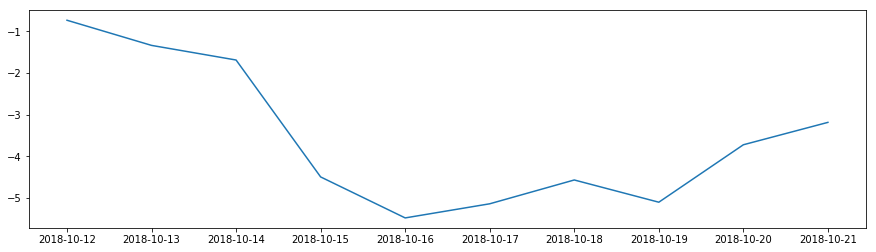

In [30]:
plt.figure(figsize=(15,4))
plt.plot(s)

## DataFrame

`DataFrame` это двумерная таблица данных. <br>
Имеет индекс и набор столбцов (возможно, имеющих разные типы). <br>
Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [31]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [32]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [33]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [34]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [35]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [36]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [37]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [38]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [39]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - название столбца.

In [40]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [41]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [42]:
df.loc['b','one']

2.0

In [43]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [44]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [45]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [46]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [47]:
del df['two']
df['foo']=0.
df

,one,three,flag,foo
a,1.0,1.0,False,0.0
b,2.0,4.0,False,0.0
c,3.0,9.0,True,0.0
d,NaN,NaN,True,0.0



Добавим копию столбца `one`, в которую входят только строки до второй.

In [48]:
df['one_tr']=df['one'][:2]
df

,one,three,flag,foo,one_tr
a,1.0,1.0,False,0.0,1.0
b,2.0,4.0,False,0.0,2.0
c,3.0,9.0,True,0.0,NaN
d,NaN,NaN,True,0.0,NaN


In [49]:
df=df.loc[:,['one','one_tr']]
df

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [50]:
df2=pd.DataFrame({'one':{'e':0,'f':1},'one_tr':{'e':2}})
df2

,one,one_tr
e,0,2.0
f,1,NaN


Объединим по столбцам.

In [51]:
pd.concat([df,df2], axis=0)

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN
e,0.0,2.0
f,1.0,NaN


In [52]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,three,two
a,NaN,0.0
b,NaN,1.0
c,2.0,NaN
d,3.0,NaN


Объединим по строкам.

In [53]:
pd.concat([df,df2],axis=1)

,one,one_tr,three,two
a,1.0,1.0,NaN,0.0
b,2.0,2.0,NaN,1.0
c,3.0,NaN,2.0,NaN
d,NaN,NaN,3.0,NaN



Создадим таблицу из массива случайных чисел.

In [54]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,1.047675,-1.143840,1.487666,-0.795390
1,0.512577,-1.393669,0.229805,0.629330
2,0.561812,1.300280,-0.223783,-1.052173
3,-1.537541,1.636824,0.420136,0.102319
4,-0.387565,1.412532,-0.416243,-0.723577
5,-1.617344,0.188218,-1.585093,0.986315
6,0.254089,-0.570771,1.188747,0.510978
7,1.623332,1.362301,-0.287983,-1.205389
8,0.202875,0.381511,1.820018,0.877873
9,-0.274072,0.416187,1.728383,-0.756646


In [55]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,0.652268,-1.933097,2.244354,NaN
1,2.251482,-2.156475,-0.935031,NaN
2,-0.847216,0.459933,1.452732,NaN
3,-1.872395,0.870940,-0.267882,NaN
4,-0.551765,2.339055,-1.174038,NaN
5,-1.306939,-1.528331,-1.062586,NaN
6,0.439756,0.379817,1.222286,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


Прошу заметить, что объекты **не изменяются пока мы их не перезапишем в явном виде**, например: `df = df+df2`

In [56]:
df

,A,B,C,D
0,1.047675,-1.143840,1.487666,-0.795390
1,0.512577,-1.393669,0.229805,0.629330
2,0.561812,1.300280,-0.223783,-1.052173
3,-1.537541,1.636824,0.420136,0.102319
4,-0.387565,1.412532,-0.416243,-0.723577
5,-1.617344,0.188218,-1.585093,0.986315
6,0.254089,-0.570771,1.188747,0.510978
7,1.623332,1.362301,-0.287983,-1.205389
8,0.202875,0.381511,1.820018,0.877873
9,-0.274072,0.416187,1.728383,-0.756646


In [57]:
2*df+3

,A,B,C,D
0,5.095349,0.712320,5.975331,1.409219
1,4.025154,0.212662,3.459610,4.258661
2,4.123623,5.600561,2.552435,0.895655
3,-0.075083,6.273648,3.840272,3.204637
4,2.224870,5.825064,2.167513,1.552847
5,-0.234689,3.376437,-0.170187,4.972630
6,3.508178,1.858458,5.377494,4.021957
7,6.246664,5.724601,2.424035,0.589221
8,3.405750,3.763022,6.640035,4.755747
9,2.451857,3.832373,6.456766,1.486709


In [58]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.038584,0.358957,0.436165,-0.142636
std,1.033182,1.098645,1.109142,0.849602
min,-1.617344,-1.393669,-1.585093,-1.205389
25%,-0.359192,-0.381024,-0.271933,-0.785704
50%,0.228482,0.398849,0.324970,-0.310629
75%,0.549503,1.346796,1.412936,0.599742
max,1.623332,1.636824,1.820018,0.986315


Можем отсортировать по значениям в колонке.

In [59]:
df.sort_values(by='C')

,A,B,C,D
5,-1.617344,0.188218,-1.585093,0.986315
4,-0.387565,1.412532,-0.416243,-0.723577
7,1.623332,1.362301,-0.287983,-1.205389
2,0.561812,1.300280,-0.223783,-1.052173
1,0.512577,-1.393669,0.229805,0.629330
3,-1.537541,1.636824,0.420136,0.102319
6,0.254089,-0.570771,1.188747,0.510978
0,1.047675,-1.143840,1.487666,-0.795390
9,-0.274072,0.416187,1.728383,-0.756646
8,0.202875,0.381511,1.820018,0.877873


Атрибут iloc подобен loc: первый индекс - индекс строки, второй - индекс столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [60]:
df.iloc[2]

A    0.561812
B    1.300280
C   -0.223783
D   -1.052173
Name: 2, dtype: float64

In [61]:
df.iloc[1:3, 0:2]

,A,B
1,0.512577,-1.393669
2,0.561812,1.300280


In [62]:
df.iloc[1:3,0:2]

,A,B
1,0.512577,-1.393669
2,0.561812,1.300280


Посчитаем кумулятивные суммы.

In [63]:
cs=df.cumsum()
cs

,A,B,C,D
0,1.047675,-1.143840,1.487666,-0.795390
1,1.560251,-2.537509,1.717471,-0.166060
2,2.122063,-1.237229,1.493688,-1.218233
3,0.584522,0.399596,1.913824,-1.115914
4,0.196957,1.812128,1.497581,-1.839491
5,-1.420388,2.000346,-0.087513,-0.853176
6,-1.166299,1.429575,1.101234,-0.342197
7,0.457033,2.791876,0.813252,-1.547587
8,0.659908,3.173387,2.633269,-0.669713
9,0.385837,3.589573,4.361652,-1.426359


И построим график.

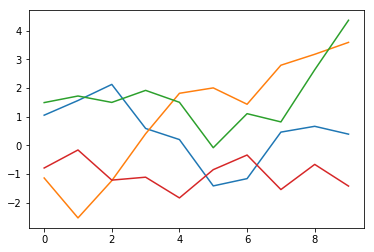

In [64]:
plt.plot(cs)

## Чтение файлов

Так как основная форма обмена информации это таблицы, то нужно научиться загружать их и записывать.<br>
В `Pandas` есть удобные методы для чтения`.read_csv()`/`.read_excel()`/`.read_table()` и `.to_csv()`/`.to_excel()`

Прочитаем файл и вглянем на его.

In [65]:
data = pd.read_csv('../data/bank.csv',sep=';')

In [66]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [70]:
data = pd.read_csv('../data/bank.xlsx',sep=';')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 1: invalid continuation byte

In [71]:
data = pd.read_excel('../data/bikes_rent.xls')

In [72]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,6,0,2,985
1,1,0,1,0,0,0,2,801
2,1,0,1,0,1,1,1,1349
3,1,0,1,0,2,1,1,1562
4,1,0,1,0,3,1,1,1600


Создами колонку с кумулятивной суммой поездок.

In [73]:
data['cum_sum'] = data['cnt'].cumsum()

In [74]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt,cum_sum
0,1,0,1,0,6,0,2,985,985
1,1,0,1,0,0,0,2,801,1786
2,1,0,1,0,1,1,1,1349,3135
3,1,0,1,0,2,1,1,1562,4697
4,1,0,1,0,3,1,1,1600,6297


Перезапишем наш файл.

In [75]:
data.to_csv('../data/bikes_rent.csv', index=False)

С запись в экселевский формат немного длиннее. Сначало нам нужно создать объект, который будет записывать файл и в него передать нашу таблицу.

In [76]:
writer = pd.ExcelWriter('bikes_rent.xlsx')
data.to_excel(writer, sheet_name ='bikes_rent_sheet')